# Audio Data Science - HiveFive

# 1. Preprocessing

## 1.1 Exploration

In [1]:
import os
import shap
import sklearn
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
path_data = "../src/data/"
filename = "all_data_updated.csv"
data = pd.read_csv(os.path.join(path_data, filename))

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,device,hive number,date,hive temp,hive humidity,hive pressure,weather temp,weather humidity,weather pressure,wind speed,gust speed,weatherID,cloud coverage,rain,lat,long,file name,queen presence,queen acceptance,frames,target,time,queen status
0,1,5,2022-06-08 14:52:28,36.42,30.29,1007.45,26.68,52,1013,8.75,NaN,711,75,0,37.29,-121.95,2022-06-08--14-52-28_1.raw,1,2,8,0,0.583,0
1,1,5,2022-06-08 15:51:41,33.56,33.98,1006.93,25.99,53,1012,10.29,NaN,803,75,0,37.29,-121.95,2022-06-08--15-51-41_1.raw,1,2,8,0,0.625,0
2,1,5,2022-06-08 17:21:53,29.01,42.73,1006.68,24.49,56,1012,8.75,NaN,803,75,0,37.29,-121.95,2022-06-08--17-21-53_1.raw,0,0,8,1,0.708,1
3,1,5,2022-06-08 18:20:59,30.51,36.74,1006.68,22.97,59,1012,8.23,10.29,803,75,0,37.29,-121.95,2022-06-08--18-20-59_1.raw,0,0,8,1,0.750,1
4,1,5,2022-06-08 19:20:04,30.32,35.55,1006.58,21.52,61,1012,7.20,NaN,803,75,0,37.29,-121.95,2022-06-08--19-20-04_1.raw,0,0,8,1,0.792,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   device            1275 non-null   int64  
 1   hive number       1275 non-null   int64  
 2   date              1275 non-null   object 
 3   hive temp         1275 non-null   float64
 4   hive humidity     1275 non-null   float64
 5   hive pressure     1275 non-null   float64
 6   weather temp      1271 non-null   float64
 7   weather humidity  1275 non-null   int64  
 8   weather pressure  1275 non-null   int64  
 9   wind speed        1271 non-null   float64
 10  gust speed        281 non-null    float64
 11  weatherID         1275 non-null   int64  
 12  cloud coverage    1275 non-null   int64  
 13  rain              1275 non-null   int64  
 14  lat               1271 non-null   float64
 15  long              1271 non-null   float64
 16  file name         1275 non-null   object 


In [5]:
data.describe()

,device,hive number,hive temp,hive humidity,hive pressure,weather temp,weather humidity,weather pressure,wind speed,gust speed,weatherID,cloud coverage,rain,lat,long,queen presence,queen acceptance,frames,target,time,queen status
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1271.000000,1275.000000,1275.000000,1271.000000,281.000000,1275.000000,1275.000000,1275.0,1.271000e+03,1.271000e+03,1275.000000,1275.000000,1275.00000,1275.000000,1275.000000,1275.000000
mean,1.554510,2.709020,29.009475,44.663890,1009.179169,20.326845,63.501176,1011.370196,3.805452,4.511317,795.941176,27.868235,0.0,3.729000e+01,-1.219500e+02,0.876078,1.549020,9.10902,3.396863,0.482972,2.127843
std,0.497215,1.488587,8.172418,18.359731,2.406004,5.587868,16.207222,56.807873,2.311196,3.931787,47.263969,33.641333,0.0,7.108224e-13,5.686579e-14,0.329621,0.704151,0.99443,1.586142,0.287396,1.096649
min,1.000000,1.000000,15.500000,7.230000,1003.540000,10.750000,0.000000,0.000000,0.000000,0.450000,0.000000,0.000000,0.0,3.729000e+01,-1.219500e+02,0.000000,0.000000,8.00000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,22.455000,32.245000,1007.375000,15.480000,51.000000,1013.000000,2.060000,1.340000,800.000000,0.000000,0.0,3.729000e+01,-1.219500e+02,1.000000,1.000000,8.00000,3.000000,0.250000,1.000000
50%,2.000000,3.000000,27.910000,42.180000,1009.170000,19.280000,66.000000,1014.000000,3.600000,2.680000,801.000000,20.000000,0.0,3.729000e+01,-1.219500e+02,1.000000,2.000000,10.00000,3.000000,0.500000,3.000000
75%,2.000000,4.000000,33.075000,54.945000,1010.705000,24.850000,78.000000,1016.000000,5.660000,7.600000,802.000000,40.000000,0.0,3.729000e+01,-1.219500e+02,1.000000,2.000000,10.00000,5.000000,0.750000,3.000000
max,2.000000,5.000000,55.620000,93.470000,1015.970000,35.430000,88.000000,1021.000000,10.800000,15.430000,804.000000,100.000000,0.0,3.729000e+01,-1.219500e+02,1.000000,2.000000,10.00000,5.000000,0.958000,3.000000


In [6]:
# reset option for displaying columns
pd.reset_option('display.max_columns')

array([[<Axes: title={'center': 'device'}>,
        <Axes: title={'center': 'hive number'}>,
        <Axes: title={'center': 'hive temp'}>,
        <Axes: title={'center': 'hive humidity'}>,
        <Axes: title={'center': 'hive pressure'}>],
       [<Axes: title={'center': 'weather temp'}>,
        <Axes: title={'center': 'weather humidity'}>,
        <Axes: title={'center': 'weather pressure'}>,
        <Axes: title={'center': 'wind speed'}>,
        <Axes: title={'center': 'gust speed'}>],
       [<Axes: title={'center': 'weatherID'}>,
        <Axes: title={'center': 'cloud coverage'}>,
        <Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>],
       [<Axes: title={'center': 'queen presence'}>,
        <Axes: title={'center': 'queen acceptance'}>,
        <Axes: title={'center': 'frames'}>,
        <Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'queen s

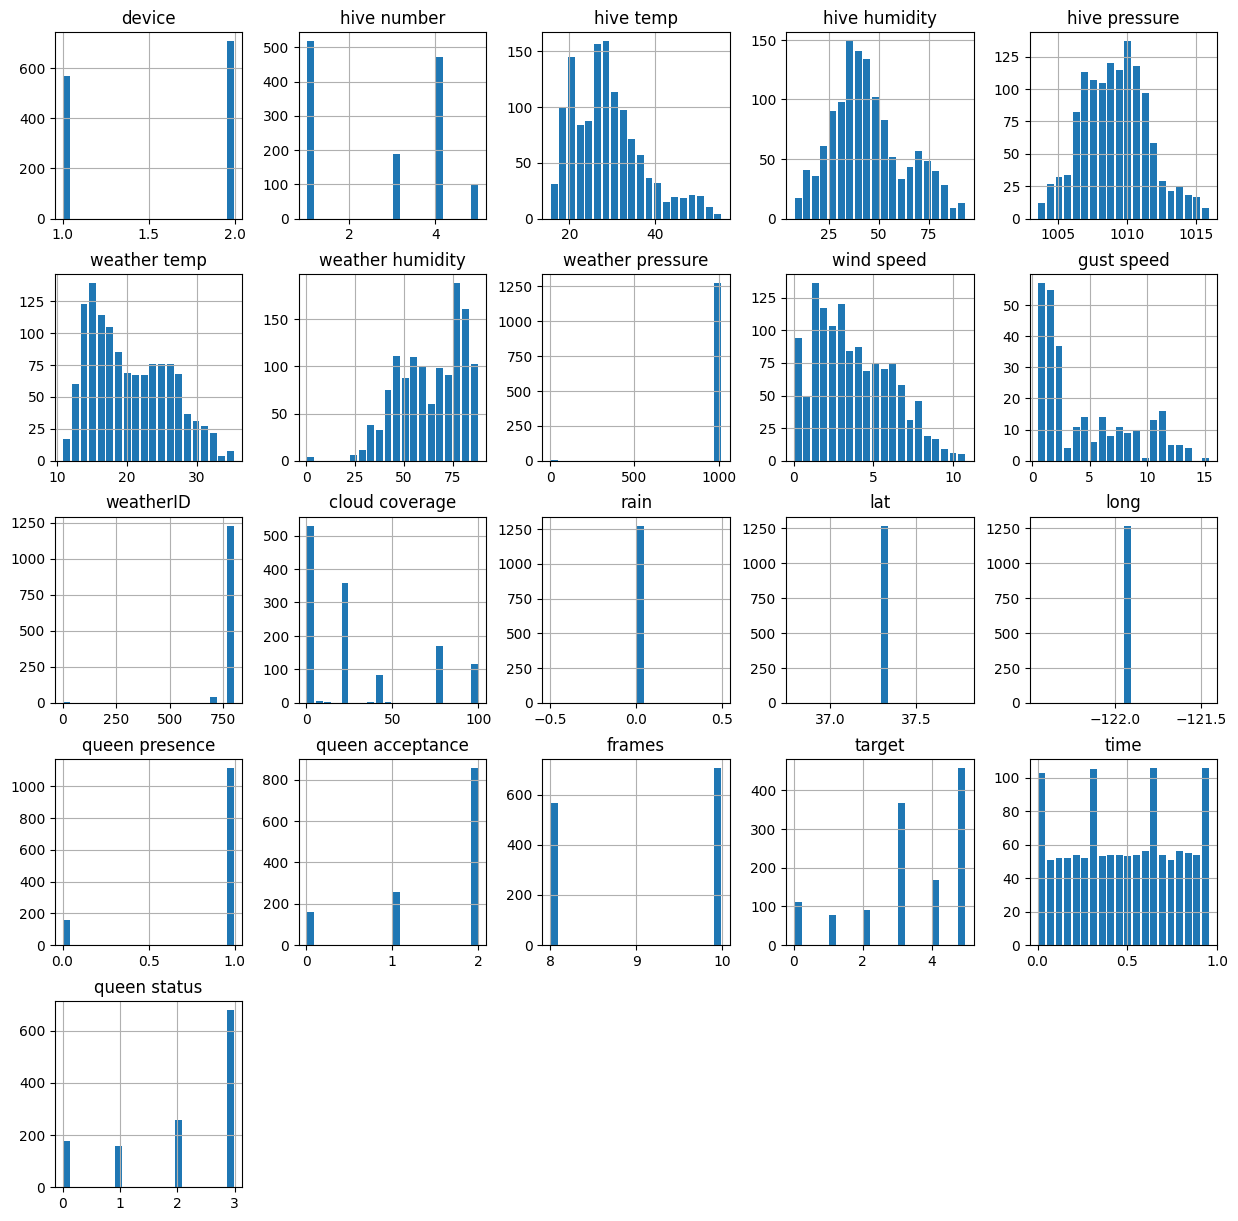

In [7]:
data.hist(figsize=(15,15), bins=20, rwidth=0.8)

### Erkenntnisse
- Bei den Features "Weather Humidity", "Weather Pressure" & "Weather ID" ist der min-Wert 0, hier kann es sein dass die Daten teilweise ungültig sind & bereinigt werden müssen(?)
- Feature "long" (Longitute) ist für alle Daten gleich und kann deshalb entfernt/vernachlässigt werden
- Feature "gust speed" ist nur für einen kleinen Teil der Daten (281 Datenpunkte) angegeben und sollte deshalb für die Analyse vernachlässigt werden
- Features "Queen Presence" & "Queen status" haben einen starken Bias und müssen ggf. angepasst werden (Oversampling etc.)
- Features "date" und "file name" liegen als Datentyp "Object" vor und sollten entsprechend umgewandelt werden

## 1.2 Bereinigung

Entfernen der Features "Gust speed" & "long" und Einträgen mit Null-Werten (4 Stk.)

In [8]:
data_cleaned = data.drop(columns=["gust speed", "long"])
data_cleaned = data_cleaned.dropna()

In [9]:
data_cleaned.shape

(1271, 21)

In [10]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1271 entries, 0 to 1274
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   device            1271 non-null   int64  
 1   hive number       1271 non-null   int64  
 2   date              1271 non-null   object 
 3   hive temp         1271 non-null   float64
 4   hive humidity     1271 non-null   float64
 5   hive pressure     1271 non-null   float64
 6   weather temp      1271 non-null   float64
 7   weather humidity  1271 non-null   int64  
 8   weather pressure  1271 non-null   int64  
 9   wind speed        1271 non-null   float64
 10  weatherID         1271 non-null   int64  
 11  cloud coverage    1271 non-null   int64  
 12  rain              1271 non-null   int64  
 13  lat               1271 non-null   float64
 14  file name         1271 non-null   object 
 15  queen presence    1271 non-null   int64  
 16  queen acceptance  1271 non-null   int64  
 17  

In [11]:
data_cleaned.head()

,device,hive number,date,hive temp,hive humidity,hive pressure,weather temp,weather humidity,weather pressure,wind speed,...,cloud coverage,rain,lat,file name,queen presence,queen acceptance,frames,target,time,queen status
0,1,5,2022-06-08 14:52:28,36.42,30.29,1007.45,26.68,52,1013,8.75,...,75,0,37.29,2022-06-08--14-52-28_1.raw,1,2,8,0,0.583,0
1,1,5,2022-06-08 15:51:41,33.56,33.98,1006.93,25.99,53,1012,10.29,...,75,0,37.29,2022-06-08--15-51-41_1.raw,1,2,8,0,0.625,0
2,1,5,2022-06-08 17:21:53,29.01,42.73,1006.68,24.49,56,1012,8.75,...,75,0,37.29,2022-06-08--17-21-53_1.raw,0,0,8,1,0.708,1
3,1,5,2022-06-08 18:20:59,30.51,36.74,1006.68,22.97,59,1012,8.23,...,75,0,37.29,2022-06-08--18-20-59_1.raw,0,0,8,1,0.750,1
4,1,5,2022-06-08 19:20:04,30.32,35.55,1006.58,21.52,61,1012,7.20,...,75,0,37.29,2022-06-08--19-20-04_1.raw,0,0,8,1,0.792,1


Umwandeln der Datentypen

In [12]:
data_cleaned["date"] = pd.to_datetime(data_cleaned["date"], format = '%Y-%m-%d %H:%M:%S')
data_cleaned["file name"] = data_cleaned["file name"].astype("string")


In [13]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1271 entries, 0 to 1274
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   device            1271 non-null   int64         
 1   hive number       1271 non-null   int64         
 2   date              1271 non-null   datetime64[ns]
 3   hive temp         1271 non-null   float64       
 4   hive humidity     1271 non-null   float64       
 5   hive pressure     1271 non-null   float64       
 6   weather temp      1271 non-null   float64       
 7   weather humidity  1271 non-null   int64         
 8   weather pressure  1271 non-null   int64         
 9   wind speed        1271 non-null   float64       
 10  weatherID         1271 non-null   int64         
 11  cloud coverage    1271 non-null   int64         
 12  rain              1271 non-null   int64         
 13  lat               1271 non-null   float64       
 14  file name         1271 non-nu

## Compute spectrograms from audio

In [14]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

In [15]:
sample_audio_files_path = librosa.util.find_files("./data/raw")
sample_audio_files = []

for file in sample_audio_files_path:
    audio_time_series, sample_rate = librosa.load(file)
    sample_audio_files.append({'y': audio_time_series, 'sr': sample_rate})

In [16]:
# fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# for i in range(2):
#     for j in range(3):
#         y = sample_audio_files[i*3+j]['y']
#         sr = sample_audio_files[i*3+j]['sr']

#         melsp = librosa.feature.melspectrogram(
#             y=y, sr=sr, n_fft=2048, hop_length=256, n_mels=128, fmax=int(sr/7))
#         melsp = librosa.amplitude_to_db(melsp, ref=np.max)
#         librosa.display.specshow(melsp, x_axis='time', y_axis='mel', ax=ax[i, j], sr=sr, hop_length=256, fmax=int(sr/7))

In [21]:
import gc

def create_spectrogram(audio_data, sample_rate, image_filename):
    fig, ax = plt.subplots(1, 1, figsize=(7.50, 3.50))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    # 3150 Hz (int(sample_rate/7)) is set as the max frequency for the spectrogram
    ms = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate, n_fft=2048, hop_length=256, n_mels=128, fmax=int(sample_rate/7))
    log_ms = librosa.amplitude_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sample_rate)

    fig.savefig(image_filename)
    plt.close(fig)
    del fig, ax, ms, log_ms
    gc.collect()

In [39]:
import os
import gc

# src_path: path to the directory containing the audio files
# target_path: path to the directory where the spectrograms will be saved
# batch_size: number of audio files to process at once
# limit: number of audio files to process, None if all files should be processed
def compute_melspectrogram(src_path, target_path, batch_size=50, offset=0, limit=None):
    audio_files = librosa.util.find_files(src_path)

    if offset > 0:
        print(f"Skipping {offset} files.")

    for i in range(offset, len(audio_files), batch_size):
        for j in range(i, min(i+batch_size, len(audio_files))):
            if j == limit:
                return

            audio_time_series, sample_rate = librosa.load(audio_files[j])

            # Retrieve the filename without the path
            basename = os.path.basename(audio_files[j])
            # Remove the extension
            target_filename = os.path.splitext(basename)[0]

            target_filename_with_path = os.path.join(target_path, target_filename + ".png")
            if os.path.exists(target_filename_with_path):
                print(f"Skip file {target_filename} (file {j}/{len(audio_files)}): Already exists in the target path.")
                continue

            create_spectrogram(audio_time_series, sample_rate, target_filename_with_path)
            print(f"Created spectogram for {target_filename} (file {j}/{len(audio_files)}).")

        print(f"--- Checkpoint: Processed {min(i+batch_size, len(audio_files))} files. ---")
        del audio_time_series
        gc.collect()
        
    print("--- SUCCESS: All files processed. ---")


In [40]:
compute_melspectrogram(src_path="../src/data/raw", target_path="../src/data/processed/", batch_size=100)

Skipping 7000 files.
Created spectogram for 2022-07-15--05-17-44_1__segment0 (file 7000/7100).
Created spectogram for 2022-07-15--05-17-44_1__segment1 (file 7001/7100).
Created spectogram for 2022-07-15--05-17-44_1__segment2 (file 7002/7100).
Created spectogram for 2022-07-15--05-17-44_1__segment3 (file 7003/7100).
Created spectogram for 2022-07-15--05-17-44_1__segment4 (file 7004/7100).
Created spectogram for 2022-07-15--05-17-44_1__segment5 (file 7005/7100).
Created spectogram for 2022-07-15--06-05-42_2__segment0 (file 7006/7100).
Created spectogram for 2022-07-15--06-05-42_2__segment1 (file 7007/7100).
Created spectogram for 2022-07-15--06-05-42_2__segment2 (file 7008/7100).
Created spectogram for 2022-07-15--06-05-42_2__segment3 (file 7009/7100).
Created spectogram for 2022-07-15--06-05-42_2__segment4 (file 7010/7100).
Created spectogram for 2022-07-15--06-05-42_2__segment5 (file 7011/7100).
Created spectogram for 2022-07-15--06-16-56_1__segment0 (file 7012/7100).
Created spectogra